Made By: Santiago Uribe - Sebastian Daza

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [43]:
#load dataset
data = pd.read_csv('./obesity.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Avance 1

Descripcion conjunto de datos: 2111 registros y 17 atributos


Atributos generales:
*   Genero (Categorico)
*   Edad(Numerico)
*   Altura (Numerico)
*   Peso (Numerico)
*   Historial sobrepeso en la familia (Categorico)

Atributos relacionados con habitos alimenticios:
*   FAVC: Consumo frecuente de alimentos con alto contenido calórico (Categorico)
*   FCVC: Consumo frecuente de vegetales (Numerico)
*   NCP: Numero de comidas prinicpales al dia (Numerico)
*   CAEC: Consumo de alimentos entre comidas (Categorico)
*   SMOKE: La persona fuma? (Categorico)
*   CH20: Consumo de agua diario (Numerico)
*   CALC: Consumo de alcohol (Categorio)

Atributos relacionados con condicion fisica:
*   SCC: Seguimiento del consumo de calorías (Categorico)
*   FAF: Actividad fisica frecuente (Numerico)
*   TUE: Tiempo usando dispotivos electronicos (Numerico)
*   MTRANS: Transporte usado (Categorico)

Variable Objetivo:
*   NObeyesdad: Nivel de obesidad (Categorico)

La variable objetivo se etiqueta tomando en cuenta la siguiente ecuacion:

$IMC = \frac{peso}{altura^2} \hspace{1cm} (kg/m^2).$

Hay 7 posibles valores de clasificación:

*   Underweight
*   Normal
*   Overweight I
*   Overweight II
*   Obesity I
*   Obesity II
*   Obesity III




### Indicadores Estadisticos

In [44]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Una de las variables numericas mas importantes que consideramos para el estudio son la edad, la altura y el peso. Los siguientes indicadores se tomaron a 2111 registros.

Para la edad se tiene $\bar{X}_{edad} = 24,3$ y $S_{edad} = 6,3459$

Para la altura se tiene $\bar{X}_{altura} = 1,70$ y $S_{altura} = 0,0933$

Para la peso se tiene $\bar{X}_{peso} = 86,58$ y $S_{peso} = 26,1911$

In [45]:
#Separate attributes by type
obj_attributes = data.select_dtypes(include=['object']).columns.to_list()
float_attributes = data.select_dtypes(include=['float']).columns.to_list()

## Diagrama de Barras Atributos Categoricos

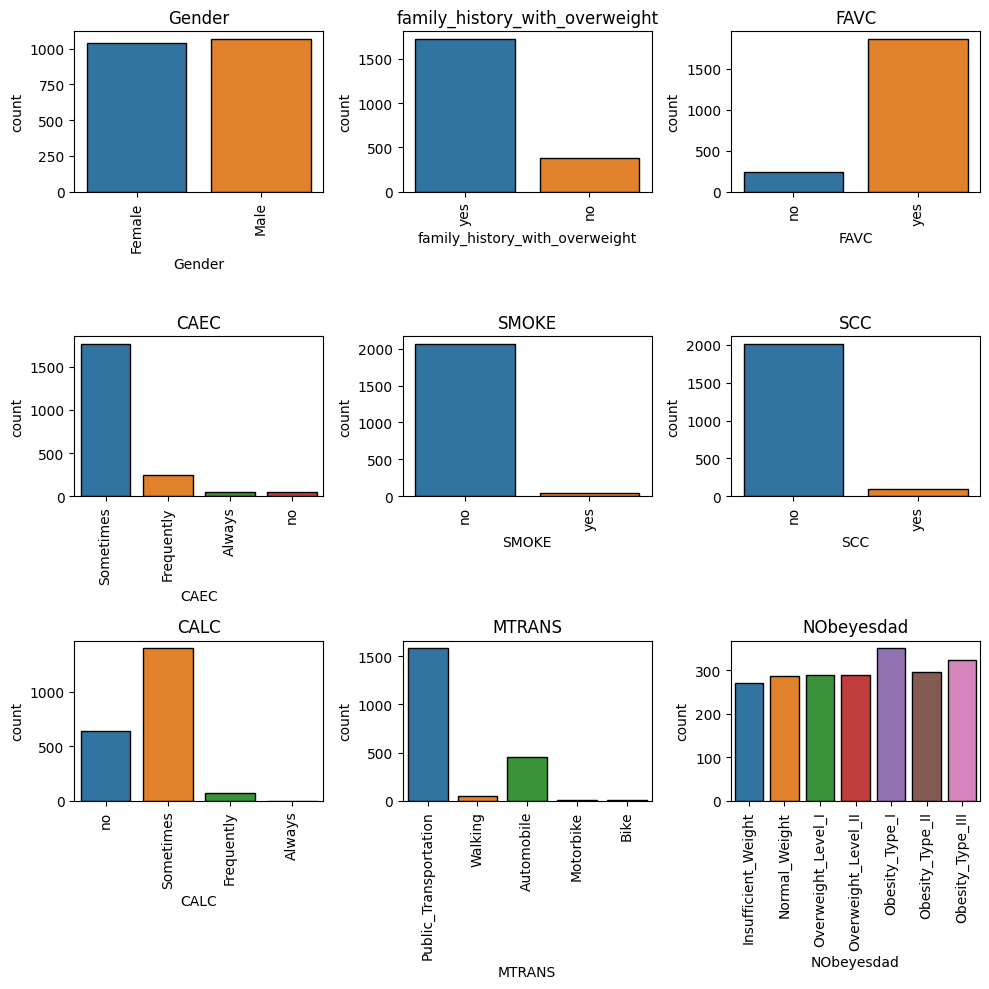

In [46]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.ravel()

for i, col in enumerate(obj_attributes):
    if col == 'NObeyesdad':
        sns.countplot(x=col, data=data, order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], ax=axs[i], edgecolor='black');
    else:
        sns.countplot(x=col, data=data, ax=axs[i], edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Para los atributos categoricos vemos que el Genero y la variable objetivo (Nivel de Obesidad) presentan datos equilibrados, sin embargo, los otros atributos presentan preferencia por una de las opciones.

## Histograma Atributos Numericas

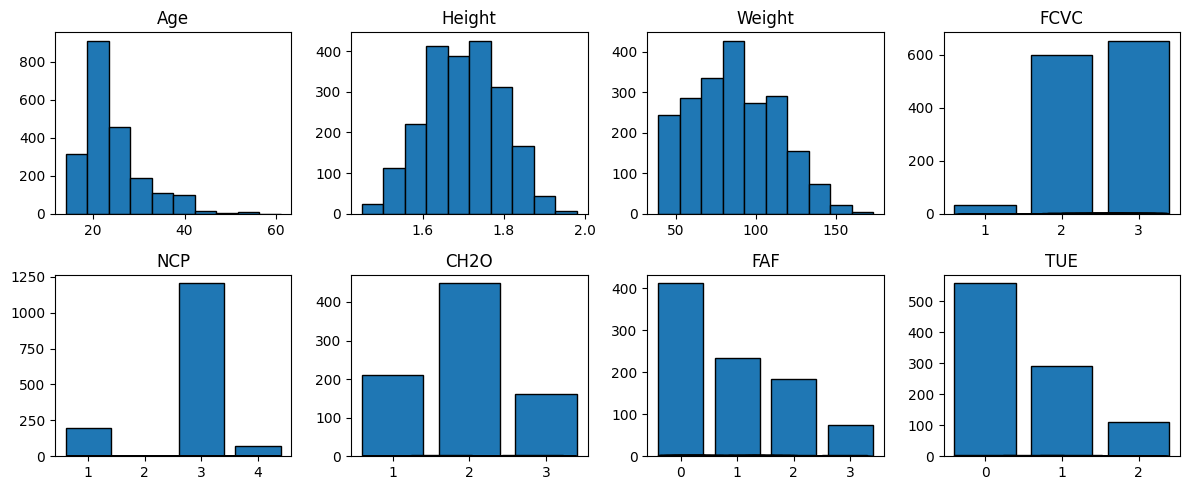

In [47]:
fig, axs = plt.subplots(2, 4, figsize=(12,5))
axs = axs[:8].ravel()

for i, col in enumerate(float_attributes):
    if col in ['Age', 'Height', 'Weight']:
        axs[i].hist(data[col], edgecolor='black')
    else:
        axs[i].bar(data[col].value_counts().index, data[col].value_counts().values, edgecolor='black')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


Para los atributos numericas podemos ver que la distribucion de algunos datos ya empieza a seguir modelos de distribucion normal, como por ejemplo la altura, y el peso y la edad con una normal sesgada a izquierda.

## Diagrama de Cajas Atributos Numericos

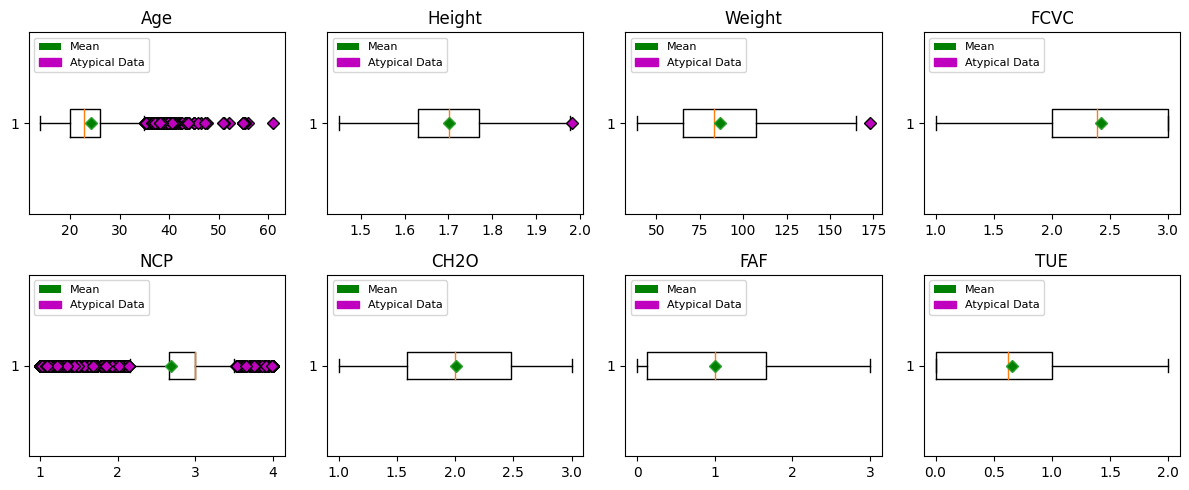

In [48]:
import matplotlib.patches as mpatches

fliers = dict(markerfacecolor='m', marker='D') #atypical data
mean_ = dict(markerfacecolor='green', marker='D')
mean_artist = mpatches.Patch(facecolor='green', label='Mean')
ad_artist = mpatches.Patch(color='m', label='Atypical Data')

fig, axs = plt.subplots(2, 4, figsize=(12,5))
axs = axs[:8].ravel()
for i, col in enumerate(float_attributes):
  bp = axs[i].boxplot(data[col], vert=False, flierprops=fliers, showmeans=True, meanprops=mean_)
  axs[i].legend(handles=[mean_artist, ad_artist], loc='upper left', fontsize=8)
  axs[i].set_title(col)

plt.tight_layout()
plt.show()


Con el diagrama de cajas podemos hacer un analisis de que la mayoria de los atributos estan agrupados a excepcion de la edad y el peso, que como se puede ver la tabla de indicadores estadisticos tienen una desviacion estandar alta. Tambien es importante destacar que los atributos de edad y NCP poseen varios datos atipicos.

## Correlacion de Atributos Numericos

<Axes: >

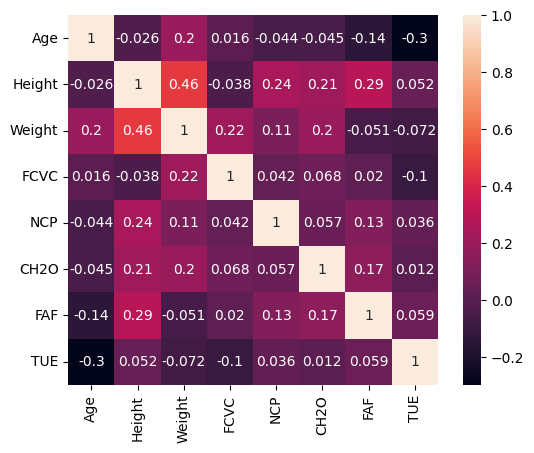

In [52]:
#correlation
numeric_cols = data.select_dtypes(include=['float64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, square=True)


Se hizo un analisis de correlaciones para determinar la relación que existe entre las variables y detectar alguna dependencia muy notaria. Sin embargo, la relacion mas alta que hubo fue entre el peso y la altura con una correlacion de 0,46. Y vemos que estas variables si estan relacionadas, por medio de la ecuacion $IMC$ de etiquetado de la variable objetivo 

In [14]:
#Conversion of categorical to numerical data
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
data_copy = data.copy().apply(le.fit_transform) 

#normalize data (0 mean and unit variance)
for col in data_copy.columns:
  if col != 'NObeyesdad':
    data_copy[col] = preprocessing.scale(data_copy[col])

suma: 0.9023866525195567


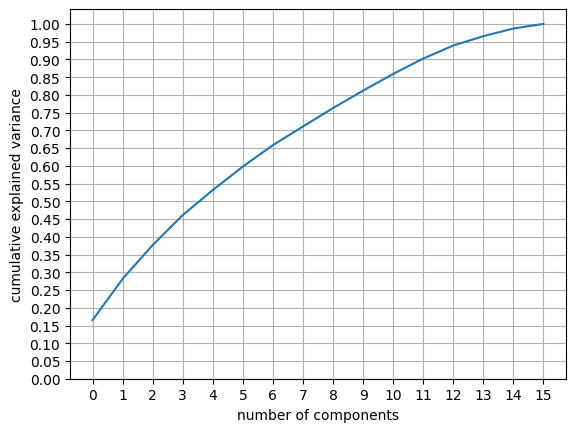

In [15]:
from sklearn.decomposition import PCA

pca=PCA(n_components=16)
pca.fit(data_copy.drop(['NObeyesdad'], axis=1)) 
X_pca=pca.transform(data_copy.drop(['NObeyesdad'], axis=1))

expl = pca.explained_variance_ratio_
print('suma:',sum(expl[0:12]))

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0, 16, 1.0))
plt.yticks(np.arange(0, 1+0.05, 0.05))
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

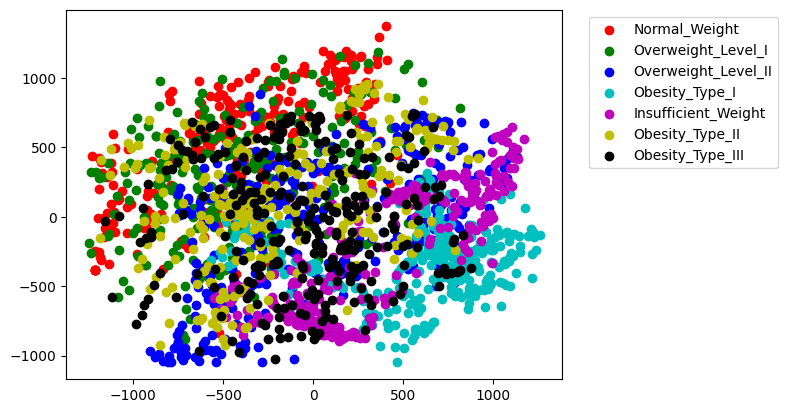

In [16]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#target variable labels selection
target_names = data['NObeyesdad'].unique()

#convert categorical attributes to numerical
le = preprocessing.LabelEncoder()
data_copy = data.copy().apply(le.fit_transform) 

#dimensionality reduction PCA
X = data_copy.drop('NObeyesdad',axis = 1)
y = data_copy['NObeyesdad']
pca = PCA(n_components=2)
proj = pca.fit_transform(X)
target_ids = range(len(target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', target_names):
    plt.scatter(proj[y == i, 0], proj[y == i, 1], c=c, label=label)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

Se realiza una reducción de dimensionalidad por medio de el análisis de componentes principales (PCA), para obtener un conjunto de nuevas características artificiales más pequeñas que el conjunto de características original. Hecho esto, se grafica la variable objetivo con respecto a 2 de sus caracteristicas nuevas para ver como se encuentran ubicados en el plano

# Avance 2

In [17]:
print(data['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


## Indicadores Estadisticos por cada Subclase de la Variable Cualitativa Objetivo

In [18]:
classes = data['NObeyesdad'].unique()
for x in classes:
  df = data[data['NObeyesdad'] == x]
  print(f"Subclase {x}")
  print(df.describe())

Subclase Normal_Weight
              Age      Height      Weight        FCVC         NCP        CH2O   
count  287.000000  287.000000  287.000000  287.000000  287.000000  287.000000  \
mean    21.738676    1.676585   62.155052    2.334495    2.738676    1.850174   
std      5.096756    0.094526    9.296031    0.590983    0.871861    0.638391   
min     14.000000    1.500000   42.300000    1.000000    1.000000    1.000000   
25%     19.000000    1.600000   55.000000    2.000000    3.000000    1.000000   
50%     21.000000    1.660000   61.000000    2.000000    3.000000    2.000000   
75%     23.000000    1.750000   68.500000    3.000000    3.000000    2.000000   
max     61.000000    1.930000   87.000000    3.000000    4.000000    3.000000   

              FAF         TUE  
count  287.000000  287.000000  
mean     1.247387    0.675958  
std      1.016362    0.686697  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    1.000000  
75%      2.000000    1.

Con respecto a lo observado en los resultados del avance 1 se proponen los siguientes intervalos de confianza

Intervalo de una poblacion para la media:

Sea $X:$ Peso de las personas con Peso Insuficiente y $X \sim Normal(\mu, σ)$

In [19]:
import scipy.stats as st 

#Poblacion 1 (Peso Insuficiente)
df1 = data[data['NObeyesdad'] == 'Insufficient_Weight']
df1_weight = df1[['Weight']]
alpha = 0.05

#Metodo 1
x_, sigma, n = np.mean(df1_weight), np.std(df1_weight), len(df1_weight)
conf_int = st.norm.interval(1-alpha, loc=x_, scale=sigma/np.sqrt(n))
print(f"Intervalo de confianza ({conf_int[0][0]};{conf_int[1][0]})")

#Metodo 2
z = st.norm.ppf(1-alpha/2)
delta = z * (sigma/np.sqrt(n))
lower_bound = x_ - delta
upper_bound = x_ + delta
print(f"Intervalo de confianza ({lower_bound[0]};{upper_bound[0]})")

Intervalo de confianza (49.19333051804953;50.619330224597526)
Intervalo de confianza (49.19333051804953;50.619330224597526)


In [20]:
x_, sigma

(49.90633037132353,
 Weight    5.999648
 dtype: float64)

El intervalo de confianza obtenido corresponde a $IC\langle \mu \rangle _{95\%} = \{ 49,1933 ; 50,6193 \}$.

Lo que nos indica que con un 95% de confianza podemos concluir que el peso de las personas con Peso Insuficiente se encuentra entre 49,1933 kg y 50,6193 kg.

Intervalo de confianza para 2 poblaciones (diferencia de proporciones):

Sea: 

*   $C:$ Personas con Obesidad Tipo I $→$ $\hat{p}_C = 0,1662$
*   $B:$ Personas con Peso Normal $→$ $\hat{p}_B = 0,1359$

In [21]:
#Funcion para calcular intervalo de confianza para la diferencia de proporciones
def CI_2_proportions(alpha, p1_, q1_, n1, p2_, q2_, n2):
  z = st.norm.ppf(1-alpha/2)
  delta = z * np.sqrt(((p1_ * q1_)/n1) + ((p2_ * q2_)/n2))
  lower_bound = (p1_ - p2_) - delta
  upper_bound = (p1_ - p2_) + delta
  return lower_bound, upper_bound

In [22]:
N = data.shape[0] #total data

#Poblacion 1 (Obesidad Tipo I)
df2 = data[data['NObeyesdad'] == 'Obesity_Type_I']
n1 = df2.shape[0]
p1_ = n1/N
q1_ = 1 - p1_
#Poblacion 2 (Peso Normal)
df3 = data[data['NObeyesdad'] == 'Normal_Weight']
n2 = df3.shape[0]
p2_ = n2/N
q2_ = 1 - p2_

#Note que se cumple que n_i * p_i > 5 y n_i * q_i > 5, para i = 1,2

#Calculo intervalo de confianza
lower_bound, upper_bound = CI_2_proportions(alpha, p1_, q1_, N, p2_, q2_, N)
print(f"Intervalo de confianza ({lower_bound};{upper_bound})")

Intervalo de confianza (0.008729715861848023;0.05190505438921782)


El intervalo de confianza para diferencia de proporciones corresponde a $IC \langle P_C - P_B \rangle _{95\%} = \{ 0,0087 ; 0,0519 \}$.

Debido al hecho de que $0 \notin IC \langle P_C - P_B \rangle _{95\%}$, sugiere que podria existir una diferencia entre las proporciones de personas con Obesidad Tipo I y personas con Peso Noral. Lo anterior se afirma con un 95% de confianza

Para estudiar los problemas de peso en comparacion con la edad (diferencias de la variable cualitativa con una variable cuantitativa). Se toma como referencia el [Ciclo de Vida](https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx) del Ministerio de Salud de Colombia, la variable se dividara de la siguiente manera:


*   Juventud: (14 - 26 años)
*   Adultez: (27- 61 años)

Tomamos como "exito" el resultado Juventud.

In [23]:
#Add new column to df
edad_cat = []
for x in data['Age']:
  if x <= 26: edad_cat.append('Juventud')
  else: edad_cat.append('Adultez')
data['Edad_Cat'] = edad_cat

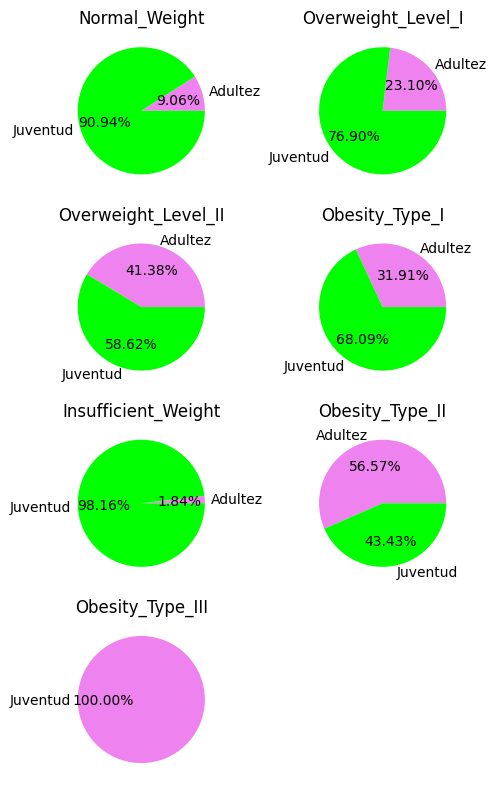

In [24]:
classes = data['NObeyesdad'].unique()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(5,8))
fig.delaxes(ax[3,1])
ax_indexes = []
for i in range(4):
  for j in range(2):
    ax_indexes.append((i,j))
del ax_indexes[-1]

for x, ax_i in zip(classes, ax_indexes):
  df_i = data[data['NObeyesdad'] == x]
  r , c = ax_i[0], ax_i[1]
  df_i.groupby('Edad_Cat').size().plot(kind='pie', subplots=True, autopct='%1.2f%%', ax=ax[r,c], colors=['violet', 'lime'], label='')
  ax[r,c].set_title(x)

plt.tight_layout()
plt.show()

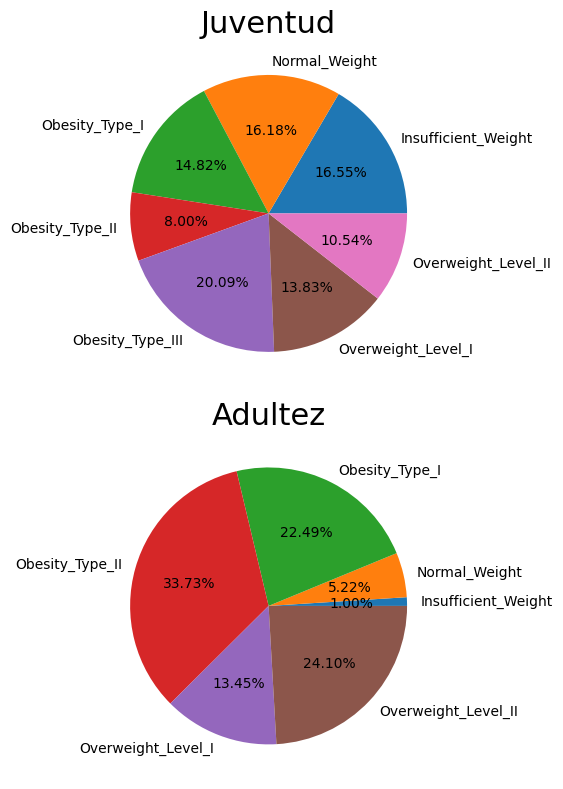

In [25]:
df_pie = data[data['Edad_Cat'] == 'Juventud']
df_pie2 = data[data['Edad_Cat'] == 'Adultez']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 8))
df_pie.groupby('NObeyesdad').size().plot(kind='pie', subplots=True, autopct='%1.2f%%', ax=ax1, label='')
df_pie2.groupby('NObeyesdad').size().plot(kind='pie', subplots=True, autopct='%1.2f%%', ax=ax2, label='')

ax1.set_title('Juventud', size=22)
ax2.set_title('Adultez', size=22)
plt.tight_layout()
plt.show()

Proporcion para cada sublclase con respecto a la variable cualitativa

In [26]:
classes = data['NObeyesdad'].unique()
prop_subclase = dict((key, value/data.shape[0]) for key, value in data['NObeyesdad'].value_counts().to_dict().items()) #proporciones de cada subclase
proportions = {}
for x in classes:
  df = data[data['NObeyesdad'] == x]
  N = df.shape[0]
  y = df['Edad_Cat'].value_counts()
  #proporciones de nueva variable edad, para cada subclase
  p_juventud = y[0] / N
  p_adultez = 1 - p_juventud
  proportions[x] = (p_juventud, p_adultez, N)

for key, value in proportions.items():
  subclase = key
  p_juventud_i = value[0]
  p_adultez_i = value[1]
  print(f"Para la sublclase {subclase}. La proporcion de Juventud es {p_juventud_i} y la proporcion de Adultez es {p_adultez_i}")

Para la sublclase Normal_Weight. La proporcion de Juventud es 0.9094076655052264 y la proporcion de Adultez es 0.09059233449477355
Para la sublclase Overweight_Level_I. La proporcion de Juventud es 0.7689655172413793 y la proporcion de Adultez es 0.2310344827586207
Para la sublclase Overweight_Level_II. La proporcion de Juventud es 0.5862068965517241 y la proporcion de Adultez es 0.4137931034482759
Para la sublclase Obesity_Type_I. La proporcion de Juventud es 0.6809116809116809 y la proporcion de Adultez es 0.31908831908831914
Para la sublclase Insufficient_Weight. La proporcion de Juventud es 0.9816176470588235 y la proporcion de Adultez es 0.018382352941176516
Para la sublclase Obesity_Type_II. La proporcion de Juventud es 0.5656565656565656 y la proporcion de Adultez es 0.43434343434343436
Para la sublclase Obesity_Type_III. La proporcion de Juventud es 1.0 y la proporcion de Adultez es 0.0


Para cada subclase de la variable objetivo vamos a calcular un intervalo de confianza para la proporcion

In [27]:
for x in classes:
  alpha = 0.05
  prop_subclase_i = prop_subclase[x]
  p_hat = proportions[x][0]
  q_hat = proportions[x][1]
  n = proportions[x][2]
  z = st.norm.ppf(1-alpha/2)
  delta = z * np.sqrt((p_hat * q_hat)/n)
  lb = p_hat - delta
  ub = p_hat + delta
  print(f"Para la subclase {x} el intervalo de confianza de 95% para la proporcion de Juventud es de: ({lb};{ub})")

Para la subclase Normal_Weight el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.8762004719482942;0.9426148590621587)
Para la subclase Overweight_Level_I el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.7204544390694854;0.8174765954132732)
Para la subclase Overweight_Level_II el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.5295221540826078;0.6428916390208403)
Para la subclase Obesity_Type_I el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.6321481238071063;0.7296752380162554)
Para la subclase Insufficient_Weight el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.965653880520914;0.9975814135967329)
Para la subclase Obesity_Type_II el intervalo de confianza de 95% para la proporcion de Juventud es de: (0.5092846344771399;0.6220284968359914)
Para la subclase Obesity_Type_III el intervalo de confianza de 95% para la proporcion de Juventud es de: (1.0;1.0)


Para cada sublcase se tiene que intervalo de confianza de 95% para la proporcion de jovenes es:


*   Insufficient_Weight: $IC\langle P \rangle _{95\%} = \{ 0,9656 ; 0,9975 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con peso insuficiente se encuentra entre 0,9656 y 0,9975.
*   Normal_Weight: $IC\langle P \rangle _{95\%} = \{ 0,8762 ; 0,9426 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con peso normal se encuentra entre 0,8762 y 0,9426.
*   Overweight_Level_I: $IC\langle P \rangle _{95\%} = \{ 0,7204 ; 0,8174 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con sobrepeso nivel I se encuentra entre 0,7204 y 0,8174.
*   Overweight_Level_II: $IC\langle P \rangle _{95\%} = \{ 0,5295 ; 0,6428 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con sobrepeso nivel II se encuentra entre 0,5295 y 0,6428.
*   Obesity_Type_I: $IC\langle P \rangle _{95\%} = \{ 0,6321 ; 0,7296 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con obesidad tipo I se encuentra entre 0,6321 y 0,7296.
*   Obesity_Type_II: $IC\langle P \rangle _{95\%} = \{ 0,5092 ; 0,6220 \}$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con obesidad tipo II se encuentra entre 0,5092 y 0,6220.
*   Obesity_Type_III: $IC\langle P \rangle _{95\%} = \{ 1,0 ; 1,0 \} \Rightarrow P = 1$. Lo que nos indica que con un 95% de confianza podemos concluir que la proporcion de jovenes con obesidad tipo III es del 100%



# Pruebas de Hipotesis



1 Poblacion

In [28]:
#Muestra de 100 personas con obesidad tipo III, su promedio y su desviacion estandar
df = data[data['NObeyesdad'] == 'Obesity_Type_III']
df = df.sample(n=100, random_state=10)
sample = df['Age'].to_list()
x_ = np.mean(sample)
s = np.std(sample)
print(f"{x_}, {s}")

23.27774501, 2.8547022045670696


La muestra informa que el promedio de edad para la gente con el problema de peso mas alarmanete (Obesidad Tipo III) es de aproximadamente 23,5. Posteriormente, se realizo una muestra con unicamente 100 personas y marco que el promedio de edad era de 23,27. Si la desviacion es de 2,8547, ¿se puede concluir que ha habido una disminucion en la media de la edad de las personas con obesidad tipo III?. Usaremos significancia del 0,05. Entonces:

$X:$ Edad de personas con obesidad tipo III

$H_0: \mu = 23,5$ vs $H_1: \mu < 23,5$

$n = 100$ (muestra grande)

El estadistico de prueba que usaremos es:

$Z_c = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}}$

In [29]:
z_alpha = st.norm.ppf(alpha)
z_alpha

-1.6448536269514729

La regla de desicion sera:


*   Rechazamos $H_0$ si: $Z_c < Z_{\alpha} = -1,64485$

In [30]:
from statsmodels.stats import weightstats as stests

mu_0 = 23.5
n = len(sample)

z_c = (x_ - mu_0)/(s/np.sqrt(n))
print(z_c)

ztest, pval = stests.ztest(x1=sample, x2=None, value=mu_0)

print(f"Z_c = {ztest}")
print(f"Z_c < -1.64485?: {ztest < z_alpha}")

print(f"p value = {pval}")
if pval <= alpha: print(f"p_value <= {alpha}: Rechazar Hipotesis Nula")
else: print(f"p_value > {alpha}: No se rechaza la hipotesis nula")


-0.7785575309551626
Z_c = -0.7746549623651351
Z_c < -1.64485?: False
p value = 0.4385435705268219
p_value > 0.05: No se rechaza la hipotesis nula


De acuerdo con lo anterior, $Z_c = -0,7746 > 1,64485$ y $p = 0,4385 > α = 0.05$ entonces NO se rechaza $H_0$. Por lo tanto, se puede decir que no existe suficiente evidencia con un nivel de significancia de 0.05 para concluir que hay una disminucion en la edad de las personas con obesidad tipo III

2 Poblaciones

Vamos a comparar si existe alguna diferencia entre las poblaciones de gente con peso normal y la poblacion con gente que no tiene historial de sobrepeso en su familia. Usaremos significancia del 0,05. Entonces:

$X1:$ Cantidad de personas con peso normal

$X2:$ Cantidad de personas sin historial de sobrepeso en su familia

$H_0: P_1 - P_2 = 0$ vs $H_1: P_1 - P_2 < 0$

El estadistico de prueba que usaremos es:

$Z_c = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{ p(1-p) \left( \frac{1}{n_1}+\frac{1}{n_2} \right)}}$, con $p=\frac{x_1+x_2}{n_1+n_2}, x_i=n_i\hat{p}_i$

In [31]:
z_alpha = st.norm.ppf(alpha)
z_alpha

-1.6448536269514729

La regla de desicion sera:


*   Rechazamos $H_0$ si: $Z_c < Z_{\alpha} = -1,64485$

In [32]:
n = data.shape[0]
p_hat_1 = prop_subclase['Normal_Weight']
p_hat_2 = data['family_history_with_overweight'].value_counts().to_dict()['no'] / n

x_1 = n * p_hat_1
x_2 = n * p_hat_2
p = (x_1 + x_2)/(n+n)

z_c = (p_hat_1 - p_hat_2)/np.sqrt(p*(1-p)*(1/n + 1/n))
print(f"Z_c = {z_c}")
print(f"Z_c < -1.64485?: {z_c < z_alpha}")

Z_c = -4.122744083658689
Z_c < -1.64485?: True


De acuerdo con lo anterior, $Z_c = -4,1227 < -1,64485$ entonces se rechaza $H_0$. Por lo tanto, se puede decir que existe suficiente evidencia con un nivel de significancia de 0.05 para concluir que la proporcion de personas con peso normal es menor a la proporcion de personas sin historial de sobrepeso en su familia

# Avance 3

In [33]:
from scipy.stats import shapiro
from scipy.stats import kstest
import statsmodels.api as sm

def normality_proofs(data):

  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), constrained_layout=True)

  #histogram
  axs[0].hist(data, edgecolor='black')
  axs[0].set_title('Histograma')

  #QQ plot
  sm.qqplot(data, line='45', ax=axs[1])
  axs[1].set_title('QQ Plot')

  fig.suptitle('Graficas Para Pruebas de Normalidad', fontsize=18)
  plt.show()

  #Shapiro-Wilk test
  shapiro_test_1 = shapiro(data)
  print(shapiro_test_1)
  if shapiro_test_1.pvalue <= 0.05: print("Se rechaza H0")
  else: print("No se rechaza H0")

Pruebas de normalidad para el Peso

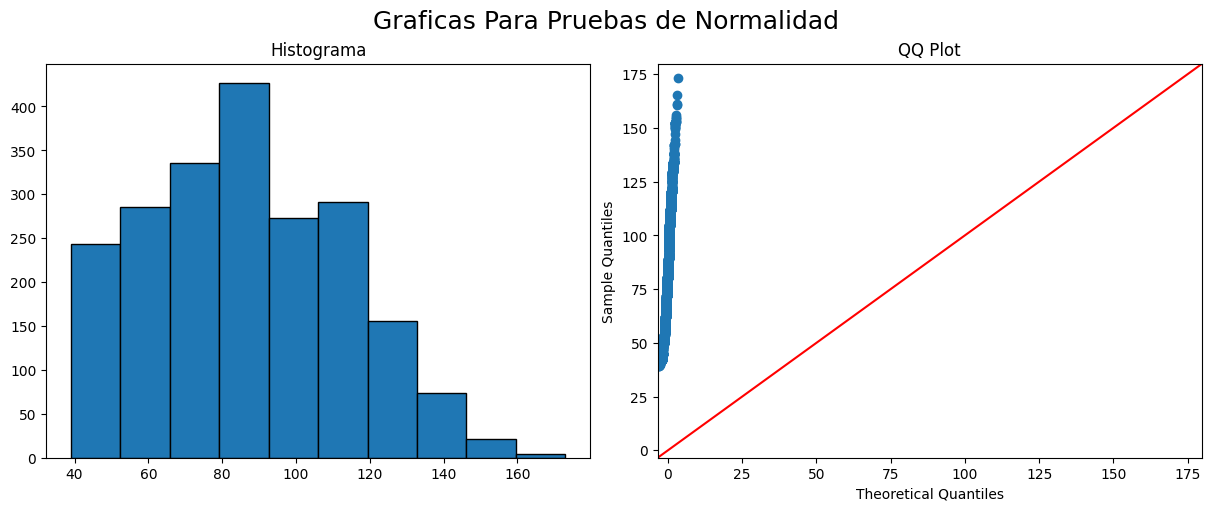

ShapiroResult(statistic=0.9764996767044067, pvalue=3.766832030646535e-18)
Se rechaza H0


In [34]:
normality_proofs(data['Weight'].to_numpy())

Pruebas de Normalidad para el peso de las personas que hacen parte de la subclase "Peso Insuficiente" de la variable "Nivel Obesidad"

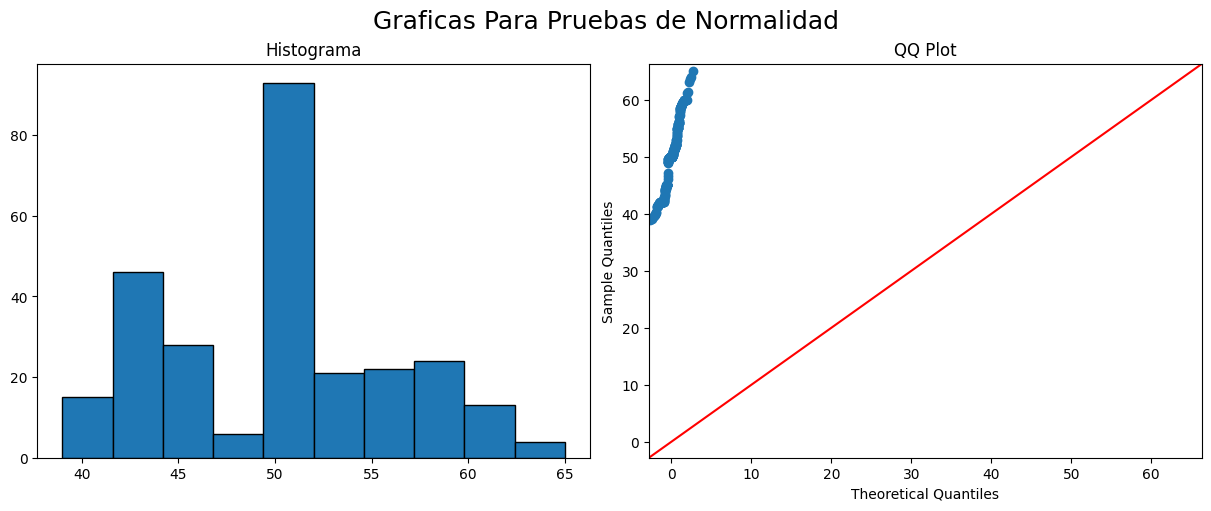

ShapiroResult(statistic=0.9517595767974854, pvalue=7.992902339992725e-08)
Se rechaza H0


In [35]:
df1 = data[data['NObeyesdad'] == 'Insufficient_Weight']
df1_weight = df1['Weight'].to_numpy()
normality_proofs(df1_weight)

Como se puede observar en el grafico QQ plot, los datos no se ajustan a la recta. Por lo que se sospecha que no vienen de una distribucion normal. Para cerciorarse de esto, realizamos la prueba de normalidad de Shapiro-Wilk test. Dado que el p value es inferior a 0,05, rechazamos la hipótesis nula de la prueba de Shapiro-Wilk. Esto significa que tenemos suficiente evidencia para decir que los datos de la muestra NO provienen de una distribución normal.

Pruebas de Normalidad para el peso de las personas que hacen parte de la subclase "Peso Normal" de la variable "Nivel Obesidad"

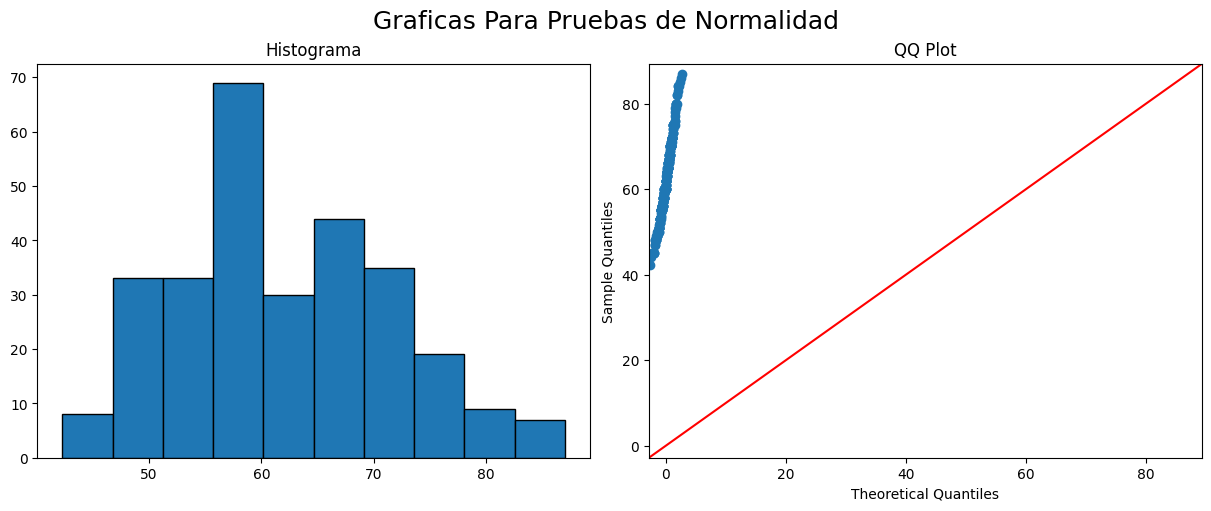

ShapiroResult(statistic=0.9849205613136292, pvalue=0.004123009741306305)
Se rechaza H0


In [36]:
df3 = data[data['NObeyesdad'] == 'Normal_Weight']
df3_weight= df3['Weight'].to_numpy()
normality_proofs(df3_weight)

Como se puede observar en el grafico QQ plot, los datos no se ajustan a la recta. Por lo que se sospecha que no vienen de una distribucion normal. Para cerciorarse de esto, realizamos la prueba de normalidad de Shapiro-Wilk test. Dado que el p value es inferior a 0,05, rechazamos la hipótesis nula de la prueba de Shapiro-Wilk. Esto significa que tenemos suficiente evidencia para decir que los datos de la muestra NO provienen de una distribución normal.

Pruebas de Normalidad para el peso de las personas que hacen parte de la subclase "Obesidad Tipo 1" de la variable "Nivel Obesidad"


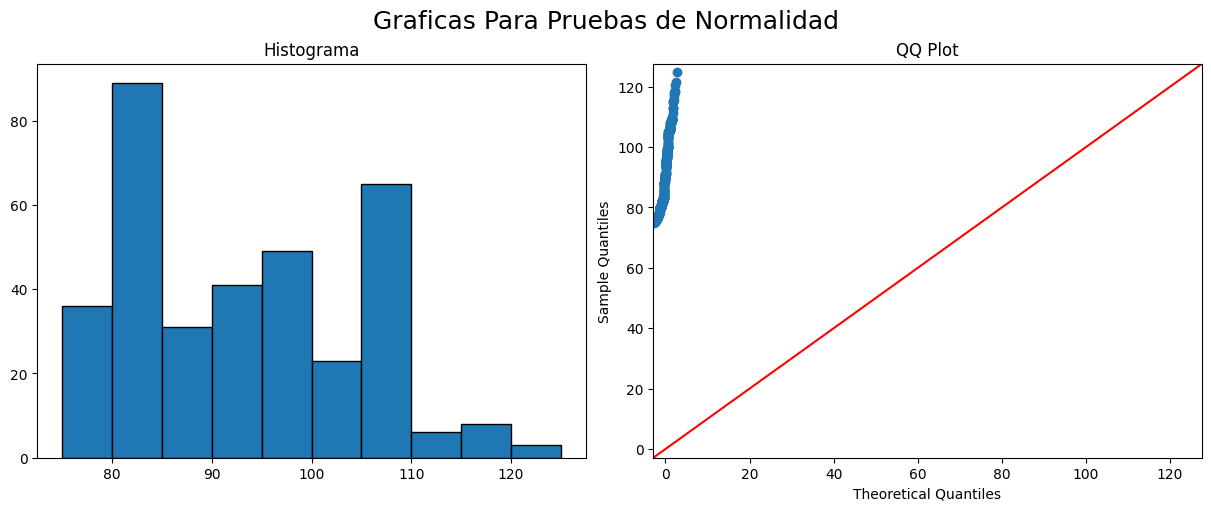

ShapiroResult(statistic=0.942676305770874, pvalue=2.073915483791211e-10)
Se rechaza H0


In [37]:
df2 = data[data['NObeyesdad'] == 'Obesity_Type_I']
df2_weight = df2['Weight'].to_numpy()
normality_proofs(df2_weight)

Como se puede observar en el grafico QQ plot, los datos no se ajustan a la recta. Por lo que se sospecha que no vienen de una distribucion normal. Para cerciorarse de esto, realizamos la prueba de normalidad de Shapiro-Wilk test. Dado que el p value es inferior a 0,05, rechazamos la hipótesis nula de la prueba de Shapiro-Wilk. Esto significa que tenemos suficiente evidencia para decir que los datos de la muestra NO provienen de una distribución normal.

Pruebas de Normalidad para la edad de las personas que hacen parte de la subclase "Obesidad Tipo 3" de la variable "Nivel Obesidad"

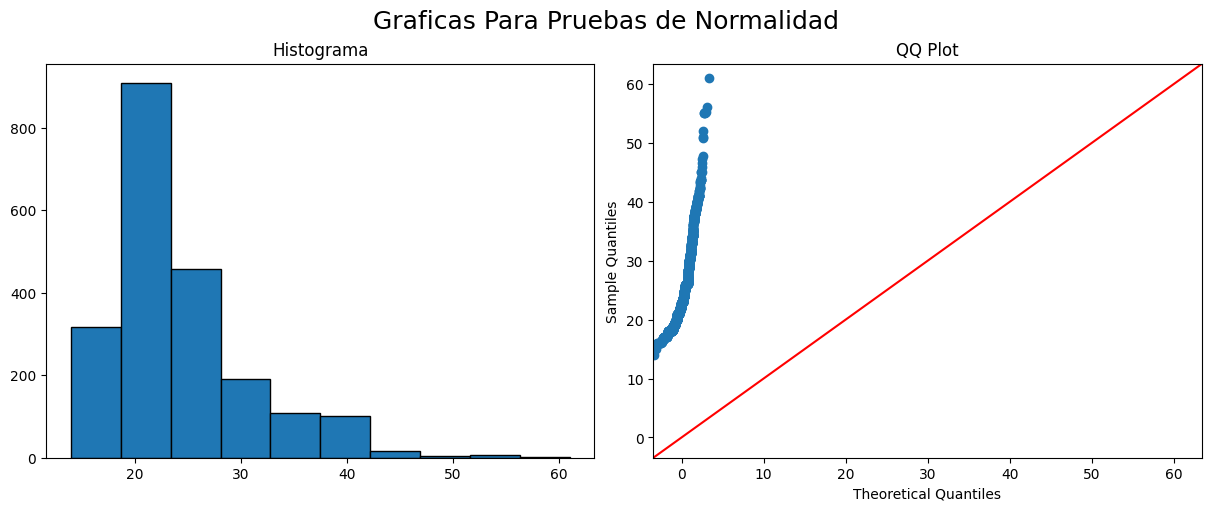

ShapiroResult(statistic=0.8660658001899719, pvalue=3.519136885397486e-39)
Se rechaza H0


In [38]:
df_age = data['Age'].to_numpy()
normality_proofs(df_age)

Como se puede observar en el grafico QQ plot, los datos no se ajustan a la recta. Por lo que se sospecha que no vienen de una distribucion normal. Para cerciorarse de esto, realizamos la prueba de normalidad de Shapiro-Wilk test. Dado que el p value es inferior a 0,05, rechazamos la hipótesis nula de la prueba de Shapiro-Wilk. Esto significa que tenemos suficiente evidencia para decir que los datos de la muestra NO provienen de una distribución normal.